In [63]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
alpha = 0.7
phi_ext = 2 * pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * cos(phi_p)*cos(phi_m) - alpha * cos(phi_ext - 2*phi_p)
In [47]:
phi_m = linspace(0, 2*pi, 100)
phi_p = linspace(0, 2*pi, 100)
X,Y = meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T
fig, ax = subplots()

p = ax.pcolor(X/(2*pi), Y/(2*pi), Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p)

In [32]:
np.clip(np.asarray([-.001,1,.001]),0,1)

array([ 0.   ,  1.   ,  0.001])

In [33]:

refiner = tri.UniformTriRefiner(_triangle)
trimesh = refiner.refine_triangulation(subdiv=4)
X = [xy2bc(xy) for xy in zip(trimesh.x, trimesh.y)]



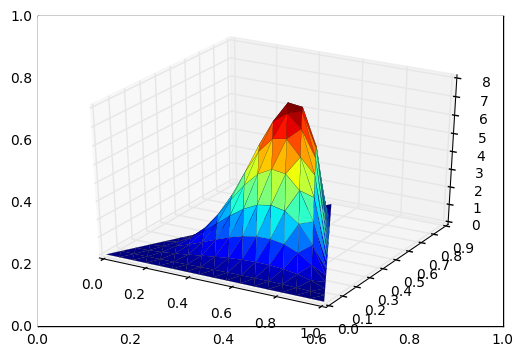

In [168]:
'''Functions for drawing contours of Dirichlet distributions.'''

# Author: Thomas Boggs

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
%matplotlib inline

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 \
              for i in range(3)]

def xy2bc(xy, tol=1.e-8):
    '''Converts 2D Cartesian coordinates to barycentric.
    Arguments:
        `xy`: A length-2 sequence containing the x and y value.
    '''
    s = [(_corners[i] - _midpoints[i]).dot(xy - _midpoints[i]) / 0.75 for i in range(3)]
    s = np.clip(s,tol,1.0 - tol)
    s = s/sum(s)
    return s

def evaluate_on_mesh(func,subdiv=8):
    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    z = [func(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
    return trimesh,z
    

def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    trimesh,pvals = evaluate_on_mesh(dist.pdf)
    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')


from scipy.stats import dirichlet
dist = dirichlet(alpha=[2,3,4])
tri,z = evaluate_on_mesh(dist.pdf,subdiv=4)
x = tri.x
y = tri.y

from matplotlib import cm
fig,ax = plt.subplots()
ax = fig.gca(projection='3d')
polycollection = ax.plot_trisurf(trimesh, pvals, cmap=cm.jet, linewidth=0.1)

In [54]:
from stl import mesh
data = np.zeros(len(tri.triangles), dtype=mesh.Mesh.dtype)
mobius_mesh = mesh.Mesh(data, remove_empty_areas=False)
mobius_mesh.x[:] = x[tri.triangles]
mobius_mesh.y[:] = y[tri.triangles]
mobius_mesh.z[:] = z[tri.triangles]
mobius_mesh.save('mobius.stl')

In [52]:
tri??

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

# u, v are parameterisation variables
u = (np.linspace(0, 2.0 * np.pi, endpoint=True, num=50) * np.ones((10, 1))).flatten()
v = np.repeat(np.linspace(-0.5, 0.5, endpoint=True, num=10), repeats=50).flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

from stl import mesh
data = np.zeros(len(tri.triangles), dtype=mesh.Mesh.dtype)
mobius_mesh = mesh.Mesh(data, remove_empty_areas=False)
mobius_mesh.x[:] = x[tri.triangles]
mobius_mesh.y[:] = y[tri.triangles]
mobius_mesh.z[:] = z[tri.triangles]
mobius_mesh.save('mobius.stl')

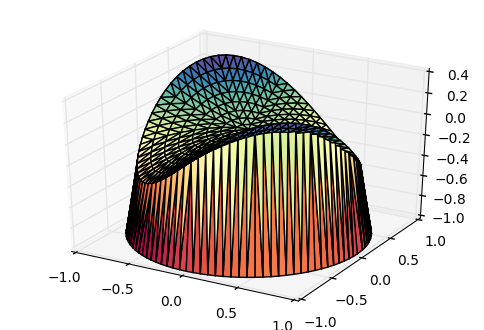

In [157]:
r_points = np.linspace(0,1,10)
n_theta =np.maximum(1,(100*r_points).astype(int)) # number of theta points for each value of the radius
r = np.repeat(r_points,n_theta)
t = np.hstack([np.linspace(.1,2*np.pi,num=n) for n in n_theta])

x = r*np.cos(t)
y = r*np.sin(t)
z = np.sin(-x*y)
z[r==1] = -1
tri = mtri.Triangulation(x, y)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# The triangles in parameter space determine which x, y, z points are
# connected by an edge
mobius_polycollection = ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)

# figure out how to give it a bottom
# figure out how this stl would print if attempted ...


In [156]:
from stl import mesh
data = np.zeros(len(tri.triangles), dtype=mesh.Mesh.dtype)
mobius_mesh = mesh.Mesh(data, remove_empty_areas=False)
mobius_mesh.x[:] = x[tri.triangles]
mobius_mesh.y[:] = y[tri.triangles]
mobius_mesh.z[:] = z[tri.triangles]
mobius_mesh.save('wobble.stl')

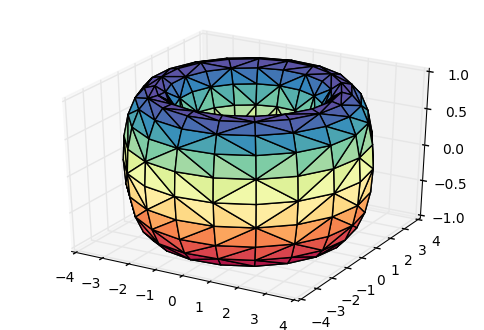

In [146]:
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, 2*np.pi, 20)
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()

x = (3 + (np.cos(v)))*np.cos(u)
y = (3 + (np.cos(v)))*np.sin(u)
z = np.sin(v)

#points2D = np.vstack([u,v]).T
tri = mtri.Triangulation(u, v)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)

from stl import mesh
data = np.zeros(len(tri.triangles), dtype=mesh.Mesh.dtype)
mobius_mesh = mesh.Mesh(data, remove_empty_areas=False)
mobius_mesh.x[:] = x[tri.triangles]
mobius_mesh.y[:] = y[tri.triangles]
mobius_mesh.z[:] = z[tri.triangles]
mobius_mesh.save('torus.stl')

# try to make a cube

In [61]:
trimesh??

In [57]:
trimesh

In [ ]:
# make these smaller to increase the resolution
dx, dy = 0.15, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(-3, 3 + dy, dy),
                slice(-3, 3 + dx, dx)]
z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()


plt.subplot(2, 2, 1)
plt.pcolor(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.title('pcolor')
# set the limits of the plot to the limits of the data
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()


plt.subplot(2, 2, 2)
plt.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.title('pcolormesh')
# set the limits of the plot to the limits of the data
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()


plt.subplot(2, 2, 3)
plt.imshow(z, cmap='RdBu', vmin=z_min, vmax=z_max,
           extent=[x.min(), x.max(), y.min(), y.max()],
           interpolation='nearest', origin='lower')
plt.title('image (nearest)')
plt.colorbar()


ax = plt.subplot(2, 2, 4)
ax.pcolorfast(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.title('pcolorfast')
plt.colorbar()

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

In [10]:
multivariate_normal?

In [14]:
#Parameters to set
from scipy.stats import multivariate_normal
rv = multivariate_normal(mean = [0, 0], cov=[[2, 1], [2, 3]])

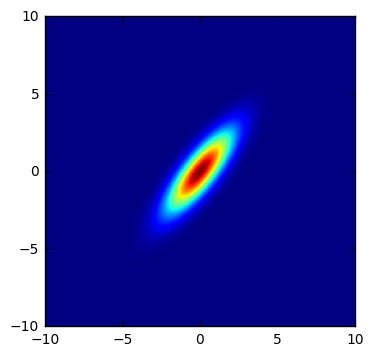

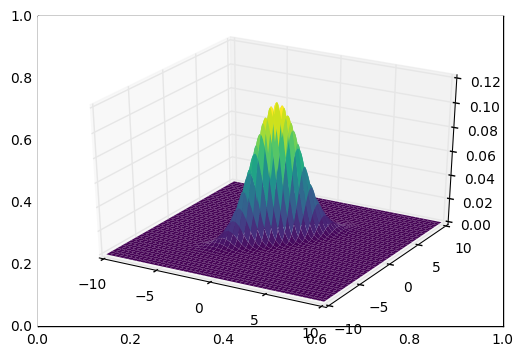

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
Z = rv.pdf(pos)


#Make a 3D plot
fig,ax = plt.subplots()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis',linewidth=0)
plt.show()

fig,ax = plt.subplots(figsize=(4,4))
mesh = ax.pcolormesh(X,Y,Z)

In [17]:
## look at stl format - maybe I can generate it directly?

In [ ]:
# Plot Dirichlet distribution
# Plot Normal distribution

In [1]:
 #!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Mon Oct  2 14:45:33 2017

@author: flattimore
"""
from models import Parallel
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
%matplotlib inline



_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 \
              for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.
    Arguments:
        `xy`: A length-2 sequence containing the x and y value.
    '''
    s = [(_corners[i] - _midpoints[i]).dot(xy - _midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

def bc2xy(a,b,c):
    """Converts R3 barycentric coordinates to xy"""
    return a*np.asarray([0,0])+b*np.asarray([1,0])+c*np.asarray([.5,np.sqrt(1-.5**2)])

def compute_contours(func,subdiv=8):
    """`func`: the function to plot over the simplex - should take an 1d numpy array of length 3."""
    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [func(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
    return trimesh,pvals

def draw_contours(trimesh,pvals,nlevels=200, border=False, eta_s = None, names = ("1","2","3"),**kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).
    Arguments: 
        `border` (bool): If True, the simplex border is drawn.
        `nlevels` (int): Number of contours to draw.
        kwargs: Keyword args passed on to `plt.triplot`.
    '''
    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    ax = plt.gca()
    ax.text(0,0, names[0],horizontalalignment='right',verticalalignment='bottom',fontsize=24)
    ax.text(1,0, names[1],horizontalalignment='left',verticalalignment='bottom',fontsize=24)
    ax.text(.5,np.sqrt(1 - .5**2), names[2],horizontalalignment='center',verticalalignment='bottom',fontsize=24)
    if eta_s is not None:
        xy= bc2xy(*eta_s)
        x,y = xy[0],xy[1]
        ax.plot(x, y, 'o')
        ax.annotate('$\eta^* = {}$'.format(eta_s),
                xy= xy,
                xytext=xy + np.asarray([.2,.2]),    # fraction, fraction
                textcoords='data',
                arrowprops=dict(facecolor='orange', shrink=0.05),
                horizontalalignment='left',
                verticalalignment='bottom',
                fontsize=20
                )
        ax.plot(x, y, 'o',color="orange")
    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)
    plt.savefig("m_eta.png",dpi=1200,bbox_inches='tight')

In [11]:
X,Y = np.meshgrid([1,2,3],[.1,.2])
print X
print Y
print "-------"
X**Y

[[1 2 3]
 [1 2 3]]
[[ 0.1  0.1  0.1]
 [ 0.2  0.2  0.2]]
-------


array([[ 1.      ,  1.071773,  1.116123],
       [ 1.      ,  1.148698,  1.245731]])

In [8]:
def eta_do(N):
    eta = np.zeros(2*N+1)
    eta[-1] = 1
    return eta
q_vals = np.linspace(0.01,0.49,50)
N_vals = range(2,16,1)
results = np.zeros((len(q_vals),len(N_vals)))
for i,p in enumerate(q_vals):
    for j, N in enumerate(N_vals):
        q = np.full(N,p)
        model = Parallel(q,0.2)
        model.pre_compute()
        a =  model.m
        b =  model.m_eta(eta_do(len(q)))
        results[i,j] = a/b



In [ ]:
N_vals[5]

In [32]:
print results[10,5]
q = np.full(N_vals[5],q_vals[10])
model = Parallel(q,0.2)
model.pre_compute()
a =  model.m
b =  model.m_eta(eta_do(len(q)))
r = a/b
results[10,5] = r

0.671949679243


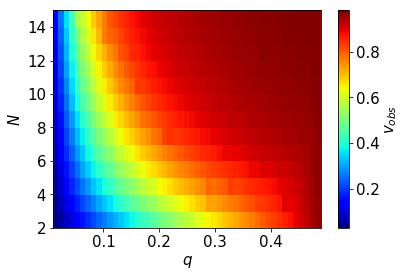

In [44]:
import seaborn as sns
from matplotlib import ticker, cm
import matplotlib
X,Y = np.meshgrid(q_vals,N_vals)
matplotlib.rcParams.update({'font.size': 15})
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, results.T,cmap = cm.jet)
cb = fig.colorbar(p,label="$v_{obs}$")
ax.set_xlabel("$q$")
ax.set_ylabel("$N$")
fig.savefig("value_of_observation.pdf",dpi=1200,bbox_inches="tight")

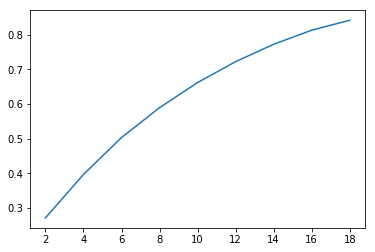

In [3]:
plt.plot(N_vals,results)

In [5]:
q = np.full(3,.1)
model = Parallel(q,0.2)
model.pre_compute()

def simplex2eta(s):
    #actions are do(x_1 = 0)...do(x_N = 0),do(x_1=1)...do(N_1=1), do() 
    n = len(q)
    return np.hstack((np.repeat(s[0]/n,n),np.repeat(s[1]/n,n),s[2]))

def mfunc(triple):
    eta = simplex2eta(triple)
    return np.log(np.log(model.m_eta(eta)))

mesh,vals = compute_contours(mfunc)
draw_contours(mesh,vals,eta_s = (.15,.74,.11),names=("$do(X_i=0)$","$do(X_i=1)$","$do()$")) 

ImportError: No module named seaborn

In [262]:
from models import ParallelConfoundedNoZAction
def simplex2eta(s,n):
    #actions are do(x_1 = 0)...do(x_N = 0),do(x_1=1)...do(N_1=1), do() 
    return np.hstack((np.repeat(s[0]/n,n),np.repeat(s[1]/n,n),s[2]))

q0 = 0.05
q1 = 0.95
q = (q0,q1,q0,q1)
pZ = .7
pY = np.asanyarray([[.2,.8],[.3,.9]])
N = 10
model = ParallelConfoundedNoZAction.create(N,N,pZ,pY,q)
model.pre_compute()

def mfunc(triple):
    eta = simplex2eta(triple,N)
    return np.log(np.log(model.m_eta(eta)))

mesh,vals = compute_contours(mfunc,subdiv=8)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.77789751322
            Iterations: 22
            Function evaluations: 196
            Gradient evaluations: 22
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.77789739485
            Iterations: 34
            Function evaluations: 337
            Gradient evaluations: 34


In [263]:
model.eta

array([ 0.07827,  0.07827,  0.07827,  0.07827,  0.07827,  0.07827,  0.07827,  0.07827,  0.07827,  0.07827,  0.02173,  0.02173,  0.02173,  0.02173,  0.02173,  0.02173,  0.02173,  0.02173,  0.02173,
        0.02173,  0.     ])

In [264]:
do0 = model.eta[0:3].sum()
do1 = model.eta[3:6].sum()
do = model.eta[-1]
print do0,do1,do

0.23480997756 0.23480997756 4.04981418586e-08


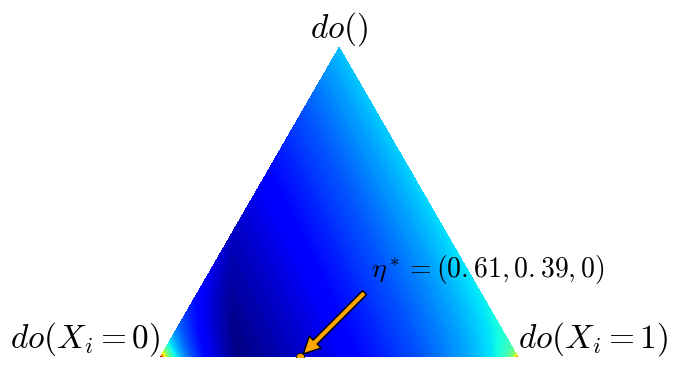

In [265]:
draw_contours(mesh,vals,eta_s = (.61,.39,0),names=("$do(X_i=0)$","$do(X_i=1)$","$do()$")) 